# Deep Devanagari with convolutions [keras]

## Summary

We are going to compare two deep learning models. The first one is a baseline neural network model and the second one is a convolutional model which achieve more accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("../input/dataset/data.csv")

In [3]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [5]:
X.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y.head()

0    character_01_ka
1    character_01_ka
2    character_01_ka
3    character_01_ka
4    character_01_ka
Name: character, dtype: object

In [7]:
num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1 

In [8]:
X_images = X.values.reshape(X.shape[0], img_width, img_height)

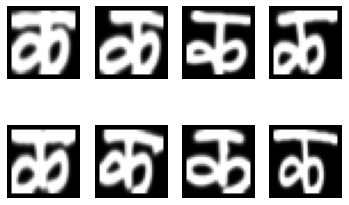

In [9]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

There are some strange values in some rows, there are only 46 characters to identify but some rows have associated a character 1024:

In [10]:
dataset.iloc[:,1024]

0        character_01_ka
1        character_01_ka
2        character_01_ka
3        character_01_ka
4        character_01_ka
              ...       
91995            digit_9
91996            digit_9
91997            digit_9
91998            digit_9
91999            digit_9
Name: character, Length: 92000, dtype: object

In [11]:
dataset.iloc[1,1024]

'character_01_ka'

In [12]:
dataset.iloc[:,1024].value_counts()

character_15_adna            2000
character_12_thaa            2000
character_10_yna             2000
character_01_ka              2000
character_23_ba              2000
digit_9                      2000
character_05_kna             2000
character_32_patalosaw       2000
character_26_yaw             2000
character_28_la              2000
character_16_tabala          2000
character_29_waw             2000
digit_2                      2000
character_07_chha            2000
character_18_da              2000
character_34_chhya           2000
character_04_gha             2000
character_14_dhaa            2000
character_13_daa             2000
digit_3                      2000
character_27_ra              2000
digit_5                      2000
character_17_tha             2000
character_35_tra             2000
character_09_jha             2000
digit_0                      2000
character_19_dha             2000
character_33_ha              2000
character_11_taamatar        2000
character_06_c

In [13]:
rows_to_remove = np.where(dataset.iloc[:,1024].values==1024)
rows_to_remove

(array([], dtype=int64),)

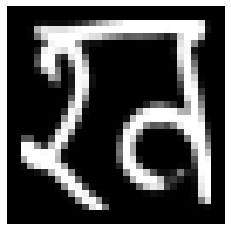

In [14]:
#sample input
plt.imshow(X_images[2000], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

These aren't valid characters so we are going to remove them:

In [15]:
#removing columns having string description of input value
dataset = dataset.drop(dataset.index[rows_to_remove[0]])

In [16]:
X = dataset.iloc[:,:-1]
X_images = X.values.reshape(X.shape[0], img_width, img_height)
Y = dataset.iloc[:,-1]

In [19]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y)

In [20]:
# data normalization
X = X / 255

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model

In [23]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
model = baseline_model()

epochs = 10
batch_size = 400
history = model.fit(X_train.values, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
148/148 - 4s - loss: 1.2642 - accuracy: 0.6677 - val_loss: 0.7790 - val_accuracy: 0.7897
Epoch 2/10
148/148 - 3s - loss: 0.5839 - accuracy: 0.8462 - val_loss: 0.5209 - val_accuracy: 0.8619
Epoch 3/10
148/148 - 3s - loss: 0.3650 - accuracy: 0.9072 - val_loss: 0.3971 - val_accuracy: 0.8923
Epoch 4/10
148/148 - 3s - loss: 0.2517 - accuracy: 0.9374 - val_loss: 0.3297 - val_accuracy: 0.9100
Epoch 5/10
148/148 - 3s - loss: 0.1853 - accuracy: 0.9556 - val_loss: 0.2985 - val_accuracy: 0.9143
Epoch 6/10
148/148 - 4s - loss: 0.1364 - accuracy: 0.9686 - val_loss: 0.2799 - val_accuracy: 0.9212
Epoch 7/10
148/148 - 4s - loss: 0.0995 - accuracy: 0.9790 - val_loss: 0.2532 - val_accuracy: 0.9301
Epoch 8/10
148/148 - 3s - loss: 0.0764 - accuracy: 0.9854 - val_loss: 0.2428 - val_accuracy: 0.9314
Epoch 9/10
148/148 - 4s - loss: 0.0560 - accuracy: 0.9915 - val_loss: 0.2480 - val_accuracy: 0.9302
Epoch 10/10
148/148 - 3s - loss: 0.0417 - accuracy: 0.9946 - val_loss: 0.2241 - val_accuracy: 0.9389

In [28]:
scores = model.evaluate(X_test.values, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.55%


## Convolutional solution

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import keras
from keras import layers

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20)

X_train = X_train/255
X_test = X_test/255

In [26]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

In [27]:
#Using LeNet-5 Architecture
##check errors
def leNet_model():
    model = keras.Sequential()

    model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(units=120, activation='relu'))
    model.add(layers.Dense(units=84, activation='relu'))
    model.add(layers.Dense(units=10, activation = 'softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
#model = leNet_model()

#early_stopping_monitor = EarlyStopping(patience=2)

#epochs = 10
#batch_size = 200
#history = model.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size)

Epoch 1/10


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 46) and (None, 10) are incompatible


In [33]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth), 
                     activation='relu', name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dense(50, activation='relu', name="dense_2"))
    model.add(Dense(num_classes, activation='softmax', name="modeloutput"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
model = cnn_model()

early_stopping_monitor = EarlyStopping(patience=2)

epochs = 10
batch_size = 200
history = model.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, 
                    callbacks=[early_stopping_monitor], verbose=2)

Epoch 1/10
295/295 - 31s - loss: 1.2217 - accuracy: 0.6679 - val_loss: 0.4081 - val_accuracy: 0.8793
Epoch 2/10
295/295 - 31s - loss: 0.3138 - accuracy: 0.9072 - val_loss: 0.2362 - val_accuracy: 0.9297
Epoch 3/10
295/295 - 31s - loss: 0.2102 - accuracy: 0.9371 - val_loss: 0.1763 - val_accuracy: 0.9469
Epoch 4/10
295/295 - 31s - loss: 0.1538 - accuracy: 0.9528 - val_loss: 0.1458 - val_accuracy: 0.9563
Epoch 5/10
295/295 - 31s - loss: 0.1196 - accuracy: 0.9633 - val_loss: 0.1295 - val_accuracy: 0.9628
Epoch 6/10
295/295 - 32s - loss: 0.0977 - accuracy: 0.9700 - val_loss: 0.1175 - val_accuracy: 0.9642
Epoch 7/10
295/295 - 31s - loss: 0.0833 - accuracy: 0.9734 - val_loss: 0.1094 - val_accuracy: 0.9673
Epoch 8/10
295/295 - 31s - loss: 0.0658 - accuracy: 0.9791 - val_loss: 0.1018 - val_accuracy: 0.9682
Epoch 9/10
295/295 - 30s - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.1010 - val_accuracy: 0.9718
Epoch 10/10
295/295 - 31s - loss: 0.0492 - accuracy: 0.9834 - val_loss: 0.1191 - val_accura

In [35]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.69%


This model produces a better performance than the baseline model